In [24]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import copy

In [64]:
LABELS_Severity = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform_resnet = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3), # to compatible with resnet
    transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform_augment = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3),
#     transforms.RandomRotation(degrees=(-15, -15)),
    transforms.GaussianBlur(kernel_size=(5, 5)),
#     transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #transforms.ColorJitter(contrast=(0.5, 0.5)),
    normalize,
    transforms.ToPILImage()
])

In [3]:

data_root = '/storage/home/hpaceice1/shared-classes/materials/ece8803fml/'
annot_train_prime = 'df_prime_train_features.csv'

annot = pd.read_csv(annot_train_prime)

label = [LABELS_Severity[drss] for drss in copy.deepcopy(annot['DRSS'].values)] 
path_list = annot['Volume_ID'].values
print(label[25])

0


/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/0.tif
1


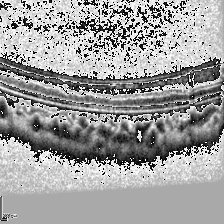

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/1.tif
1


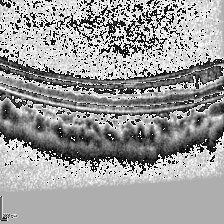

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/2.tif
1


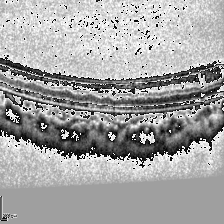

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/3.tif
1


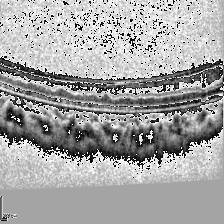

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/4.tif
1


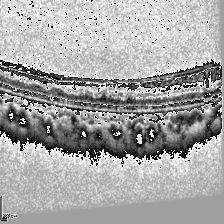

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/5.tif
1


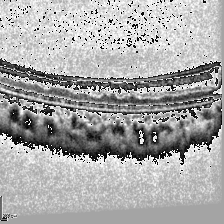

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/6.tif
1


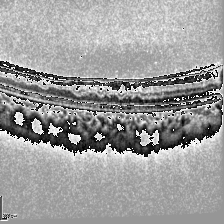

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/7.tif
1


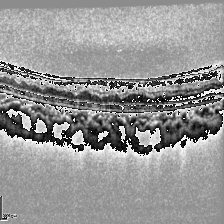

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/8.tif
1


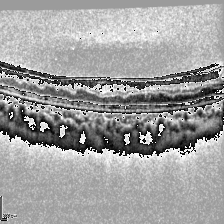

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/9.tif
1


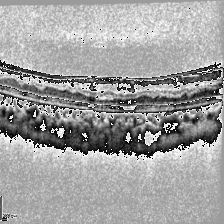

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/10.tif
1


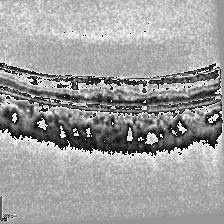

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/11.tif
1


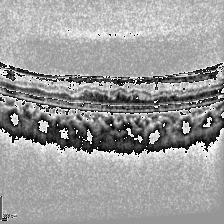

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/12.tif
1


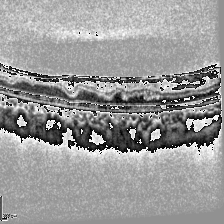

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/13.tif
1


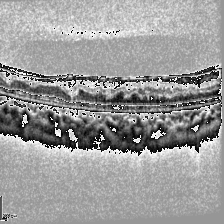

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/14.tif
1


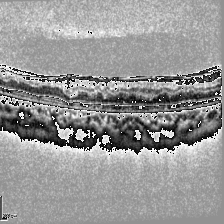

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/15.tif
1


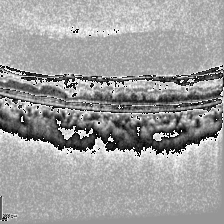

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/16.tif
1


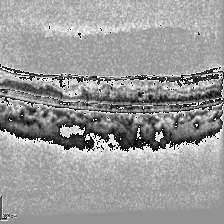

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/17.tif
1


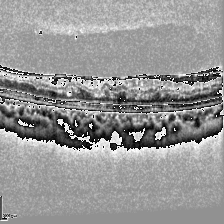

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/18.tif
1


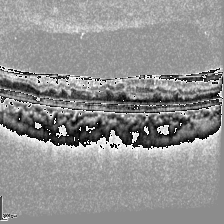

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/19.tif
1


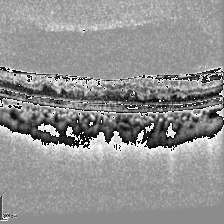

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/20.tif
1


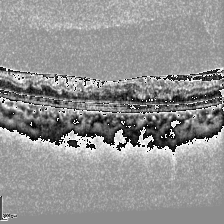

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/21.tif
1


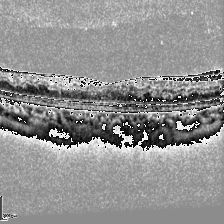

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/22.tif
1


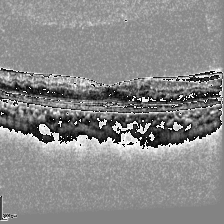

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/23.tif
1


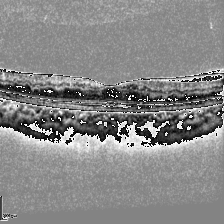

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/24.tif
1


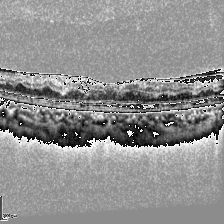

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/25.tif
1


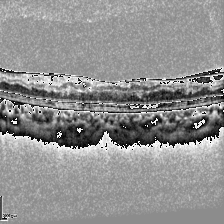

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/26.tif
1


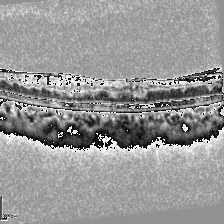

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/27.tif
1


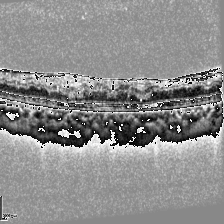

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/28.tif
1


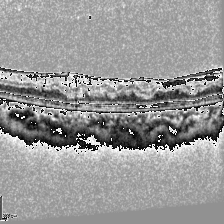

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/29.tif
1


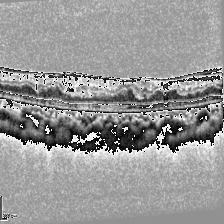

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/30.tif
1


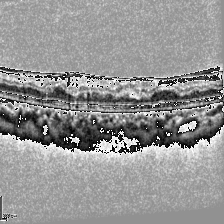

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/31.tif
1


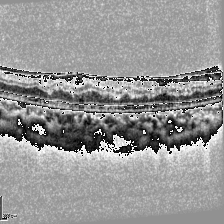

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/32.tif
1


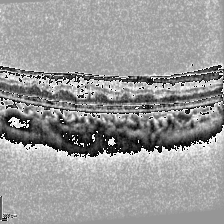

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/33.tif
1


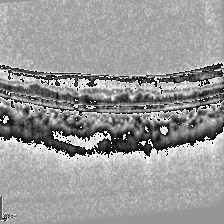

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/34.tif
1


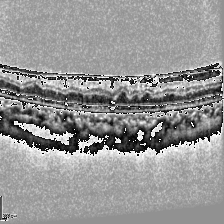

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/35.tif
1


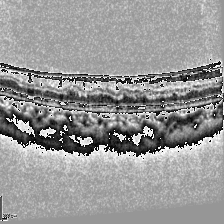

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/36.tif
1


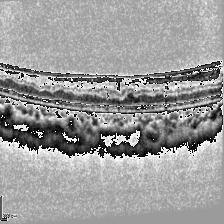

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/37.tif
1


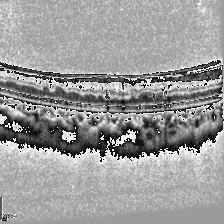

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/38.tif
1


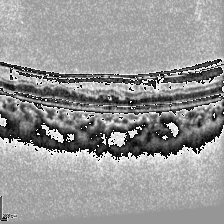

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/39.tif
1


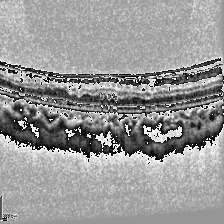

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/40.tif
1


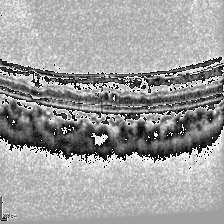

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/41.tif
1


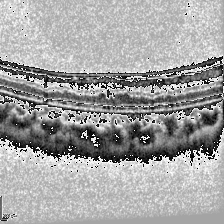

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/42.tif
1


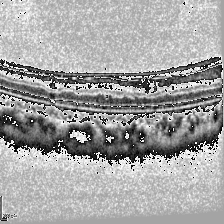

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/43.tif
1


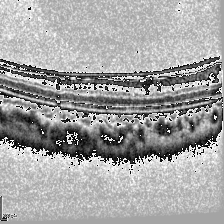

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/44.tif
1


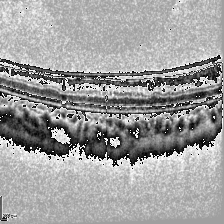

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/45.tif
1


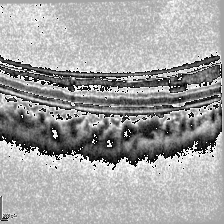

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/46.tif
1


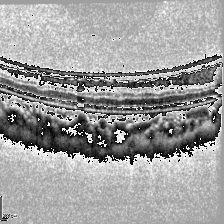

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/47.tif
1


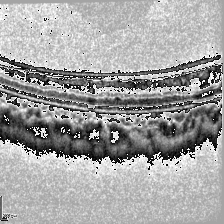

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/48.tif
1


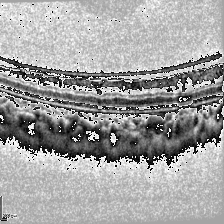

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/49.tif
1


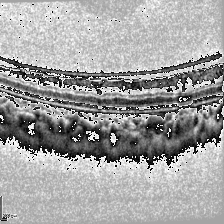

In [65]:
index = 0
folder_path = data_root + path_list[index]
for i  in range(0, 50):
    tif = str(i) + '.tif'
    png = str(i) + '.png'

    print(os.path.join(folder_path, tif))
    print(label[index])
    if (os.path.isfile(os.path.join(folder_path, tif))):
       img = Image.open(os.path.join(folder_path, tif)).convert("L")
    elif (os.path.isfile(os.path.join(folder_path, png))):
       img = Image.open(os.path.join(folder_path, png)).convert("L")
    
#     display(img)
#     img = transforms.functional.crop(img, top=80, height = 330 , width = 504, left = 0)
    display(transform_resnet(img))
#     img = transform_augment(img)
#     display(img)

# index = 0
# folder_path = data_root + path_list[index]
# for i  in range(0, 1):
#     tif = str(i) + '.tif'
#     png = str(i) + '.png'

#     print(os.path.join(folder_path, tif))
#     print(label[index])
#     if (os.path.isfile(os.path.join(folder_path, tif))):
#        img = Image.open(os.path.join(folder_path, tif)).convert("L")
#     elif (os.path.isfile(os.path.join(folder_path, png))):
#        img = Image.open(os.path.join(folder_path, png)).convert("L")
    
#     display(transform_resnet(img))
#     img = transform_augment(img)
#     display(img)

# index = 2
# folder_path = data_root + path_list[index]  
# for i  in range(0, 1):
#     tif = str(i) + '.tif'
#     png = str(i) + '.png'

#     print(os.path.join(folder_path, tif))
#     print(label[index])
#     if (os.path.isfile(os.path.join(folder_path, tif))):
#        img = Image.open(os.path.join(folder_path, tif)).convert("L")
#     elif (os.path.isfile(os.path.join(folder_path, png))):
#        img = Image.open(os.path.join(folder_path, png)).convert("L")
    
#     display(transform_resnet(img))
#     img = transform_augment(img)
#     display(img)

In [ ]:
import dataloader as dataloader